In [1]:
# 4

import warnings
warnings.filterwarnings("ignore")
from skimage import io
from skimage.util import random_noise
from skimage.transform import resize
import matplotlib.pyplot as plt

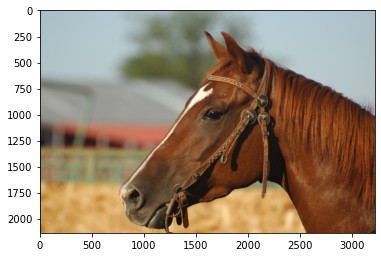

In [3]:
horse = io.imread("./datasets/images/horse.jpg")

plt.figure(figsize = (6,6))
plt.imshow(horse)

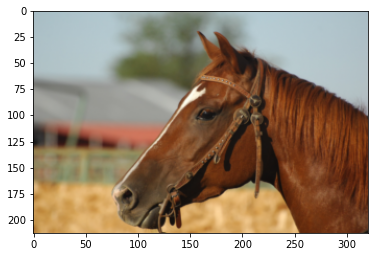

In [4]:
# resize original image to 1/10 to make denoising faster
horse = resize(horse, (int(horse.shape[0]/ 10), int(horse.shape[1]/10)))

plt.figure(figsize = (6,6))
plt.imshow(horse)

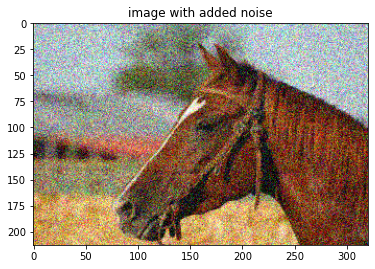

In [6]:
# adds some noise to original image
sigma = 0.155
noisy_horse = random_noise(horse, var = sigma ** 2)  # noise with gaussian distro

plt.figure(figsize = (6, 6))
plt.title("image with added noise")
plt.imshow(noisy_horse)

In [7]:
# to denoise image

from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage.restoration import denoise_wavelet, estimate_sigma

In [9]:
# estimate the gaussian noise of image, if image has gaussian noise
sigma_est = estimate_sigma(noisy_horse,
                    multichannel=True,
                    average_sigmas = True)

sigma_est  # very close to the our noise sigma bandwidth

0.1419790378769259

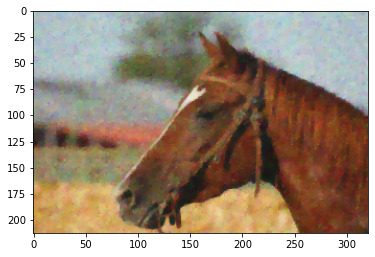

In [10]:
# one way of denoising
plt.figure(figsize = (6, 6))
plt.imshow(denoise_tv_chambolle(noisy_horse,
                                # weight is amount of denoise we wanna add to ouput image, more = more denoising and
                                # less true to intput image
                               weight = 0.1, 
                                multichannel=True))

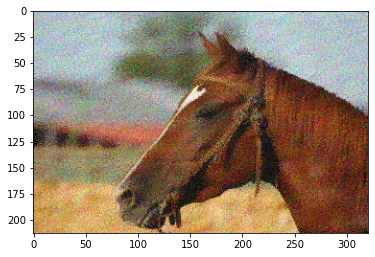

In [11]:
# alt way of denoising, also preserves the image edges
plt.figure(figsize = (6,6))
plt.imshow(denoise_bilateral(noisy_horse, sigma_color=0.05,
                            sigma_spatial = 2,
                            multichannel=True))

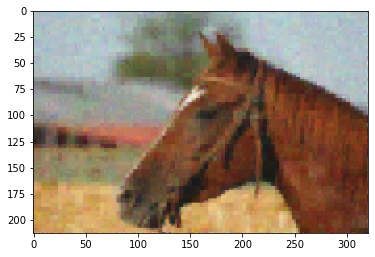

In [12]:
# alt way, used for images in dig photography
plt.figure(figsize = (6, 6))
plt.imshow(denoise_wavelet(noisy_horse, multichannel=True))